#Importing libraries and modules

In [132]:
# Various
import string
import time

# Dataframe manipulation and calculations
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from wordcloud import WordCloud

# Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, silhouette_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# NLP
import spacy
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Dataset import

In [133]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# The goal is to connect your Google Drive with this Google colab notebook.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [134]:
# This part is here to copy the file into your Drive (because we can't open a shared file)
url = 'https://drive.google.com/file/d/1L4tDDnZWwPDjeRKlleoYHgic2_xNhZ8i/view'
file_id = '1L4tDDnZWwPDjeRKlleoYHgic2_xNhZ8i'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('fr.openfoodfacts.org.products.csv')

In [135]:
df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Dataset Changes and Machine Learning

##1. Data exploration

###1.1


Find a way to open the file and display the first 10 items of the dataset above.

Then displays the number of column object and float.

In [136]:
df.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,...,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,NaN,NaN,Unfi,unfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [138]:
df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   code                                        320749 non-null  object 
 1   url                                         320749 non-null  object 
 2   creator                                     320770 non-null  object 
 3   created_t                                   320769 non-null  object 
 4   created_datetime                            320763 non-null  object 
 5   last_modified_t                             320772 non-null  object 
 6   last_modified_datetime                      320772 non-null  object 
 7   product_name                                303010 non-null  object 
 8   generic_name                                52795 non-null   object 
 9   quantity                                    104819 non-null  object 


In [139]:
df.shape

(320772, 162)

###1.2

Find a way to display on the one hand **only** the names of object columns, and on the other hand **only** the names of float columns.

In [140]:
# Selection of columns containing ONLY objects
only_object = df.select_dtypes(include=["object"])

# The list of all columns containing ONLY objects
only_object.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url']

In [141]:
# Selection of columns containing ONLY floats
only_float = df.select_dtypes(include=["float64"])

# The list of all columns containing ONLY floats
only_float.columns.to_list()

['no_nutriments',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'elaidic-acid_100g',
 'gondoic-acid_100g',
 'mead-aci

###1.3

Create a function that takes a dataframe as a parameter, and displays the filling rate of each of these columns as a percentage. That is to say :
- column 1: 73%
- column 2: 99%

In [142]:
def remplissage_col(dataframe):

  for i in dataframe:
    remplissage_col = round((dataframe[i].notnull().mean() * 100), 2)
    print("The column, 'i,' has a fill rate of", remplissage_col ,"%.")

  return

In [143]:
remplissage_col(df)

The column, 'i,' has a fill rate of 99.99 %.
The column, 'i,' has a fill rate of 99.99 %.
The column, 'i,' has a fill rate of 100.0 %.
The column, 'i,' has a fill rate of 100.0 %.
The column, 'i,' has a fill rate of 100.0 %.
The column, 'i,' has a fill rate of 100.0 %.
The column, 'i,' has a fill rate of 100.0 %.
The column, 'i,' has a fill rate of 94.46 %.
The column, 'i,' has a fill rate of 16.46 %.
The column, 'i,' has a fill rate of 32.68 %.
The column, 'i,' has a fill rate of 24.62 %.
The column, 'i,' has a fill rate of 24.62 %.
The column, 'i,' has a fill rate of 91.14 %.
The column, 'i,' has a fill rate of 91.14 %.
The column, 'i,' has a fill rate of 26.31 %.
The column, 'i,' has a fill rate of 26.31 %.
The column, 'i,' has a fill rate of 26.31 %.
The column, 'i,' has a fill rate of 6.92 %.
The column, 'i,' has a fill rate of 6.91 %.
The column, 'i,' has a fill rate of 11.38 %.
The column, 'i,' has a fill rate of 11.38 %.
The column, 'i,' has a fill rate of 14.51 %.
The column, 

###1.4

What is the number of columns belonging to each quartile of fill rates? In other words, how many columns are filled at 0%, between 0 and 25%, between 25 and 50%...

In [144]:
# 0% filled
count_quartile1 = 0
# Filled between 0 and 25%
count_quartile2 = 0
# Filled between 25 and 50%
count_quartile3 = 0
# Filled between 50 and 75%
count_quartile4 = 0
#More than 75% filled
count_quartile5 = 0
  
for i in df:
  remplissage_col = round((df[i].notnull().mean() * 100), 2)
  if remplissage_col == 0:
    count_quartile1 += 1
  elif remplissage_col <= 25:
    count_quartile2 += 1
  elif remplissage_col > 25 and remplissage_col <= 50:
    count_quartile3 += 1
  elif remplissage_col > 50 and remplissage_col <= 75:
    count_quartile4 += 1
  else:
    count_quartile5 += 1

print("There are {} columns with 0% fill." .format(count_quartile1))
print("\nThere are {} columns whose fill rate is less than or equal to 25%." .format(count_quartile2))
print("\nThere are {} columns whose fill rate is between 25% and 50%." .format(count_quartile3))
print("\nThere are {} columns whose fill rate is between 50% and 75%." .format(count_quartile4))
print("\nThere are {} columns with a fill rate greater than 75%." .format(count_quartile5))



There are 31 columns with 0% fill.

There are 81 columns whose fill rate is less than or equal to 25%.

There are 16 columns whose fill rate is between 25% and 50%.

There are 6 columns whose fill rate is between 50% and 75%.

There are 28 columns with a fill rate greater than 75%.


##2. Data Selection

###2.1 Choice of country

We want to focus on foods available in France, where we are going to launch the platform.
There are sometimes several countries present for the same product, we will therefore select all the products for which France appears among the countries of origin.

In [145]:
len(df[df["countries_tags"].str.contains("france")==True])

98440

In [146]:
len(df[(df["countries"].str.contains("France", case=False)==True ) | ( df['countries'].str.contains("FR")==True )  ] )

98130

In [147]:
len(df[df["countries_fr"].str.contains("France")==True])

98440

We see that the two indicators countries-tags and countries-fr return the same number of rows, so we can make our selection of French products on both.

In [148]:
df_france = df[df['countries_tags'].str.contains("france")==True]
df_france.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,...,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,36252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,NaN,NaN,Sunridge,sunridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Roissy,France",NaN,"France, US","en:france,en:united-states","France,États-Unis","Milk chocolate coating (evaporated cane juice,...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Roissy,France",NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###2.2 Remove duplicates

In [149]:
# We remove the duplicates, based on the codes.

df_france.drop_duplicates(subset=["code"])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,...,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,36252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,NaN,NaN,Sunridge,sunridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Roissy,France",NaN,"France, US","en:france,en:united-states","France,États-Unis","Milk chocolate coating (evaporated cane juice,...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Roissy,France",NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906

In [150]:
# Check that there are no duplicates.

df_france[df_france.duplicated()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,...,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


###2.3 Removal of non-usable columns

We will delete the data that does not interest us. For this we will define an arbitrary measure, namely that we will only keep the columns that are filled at least 60%.

In [151]:
def null_factor(df, tx_threshold=50):
  null_rate = ((df_france.isnull().sum() / df_france.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

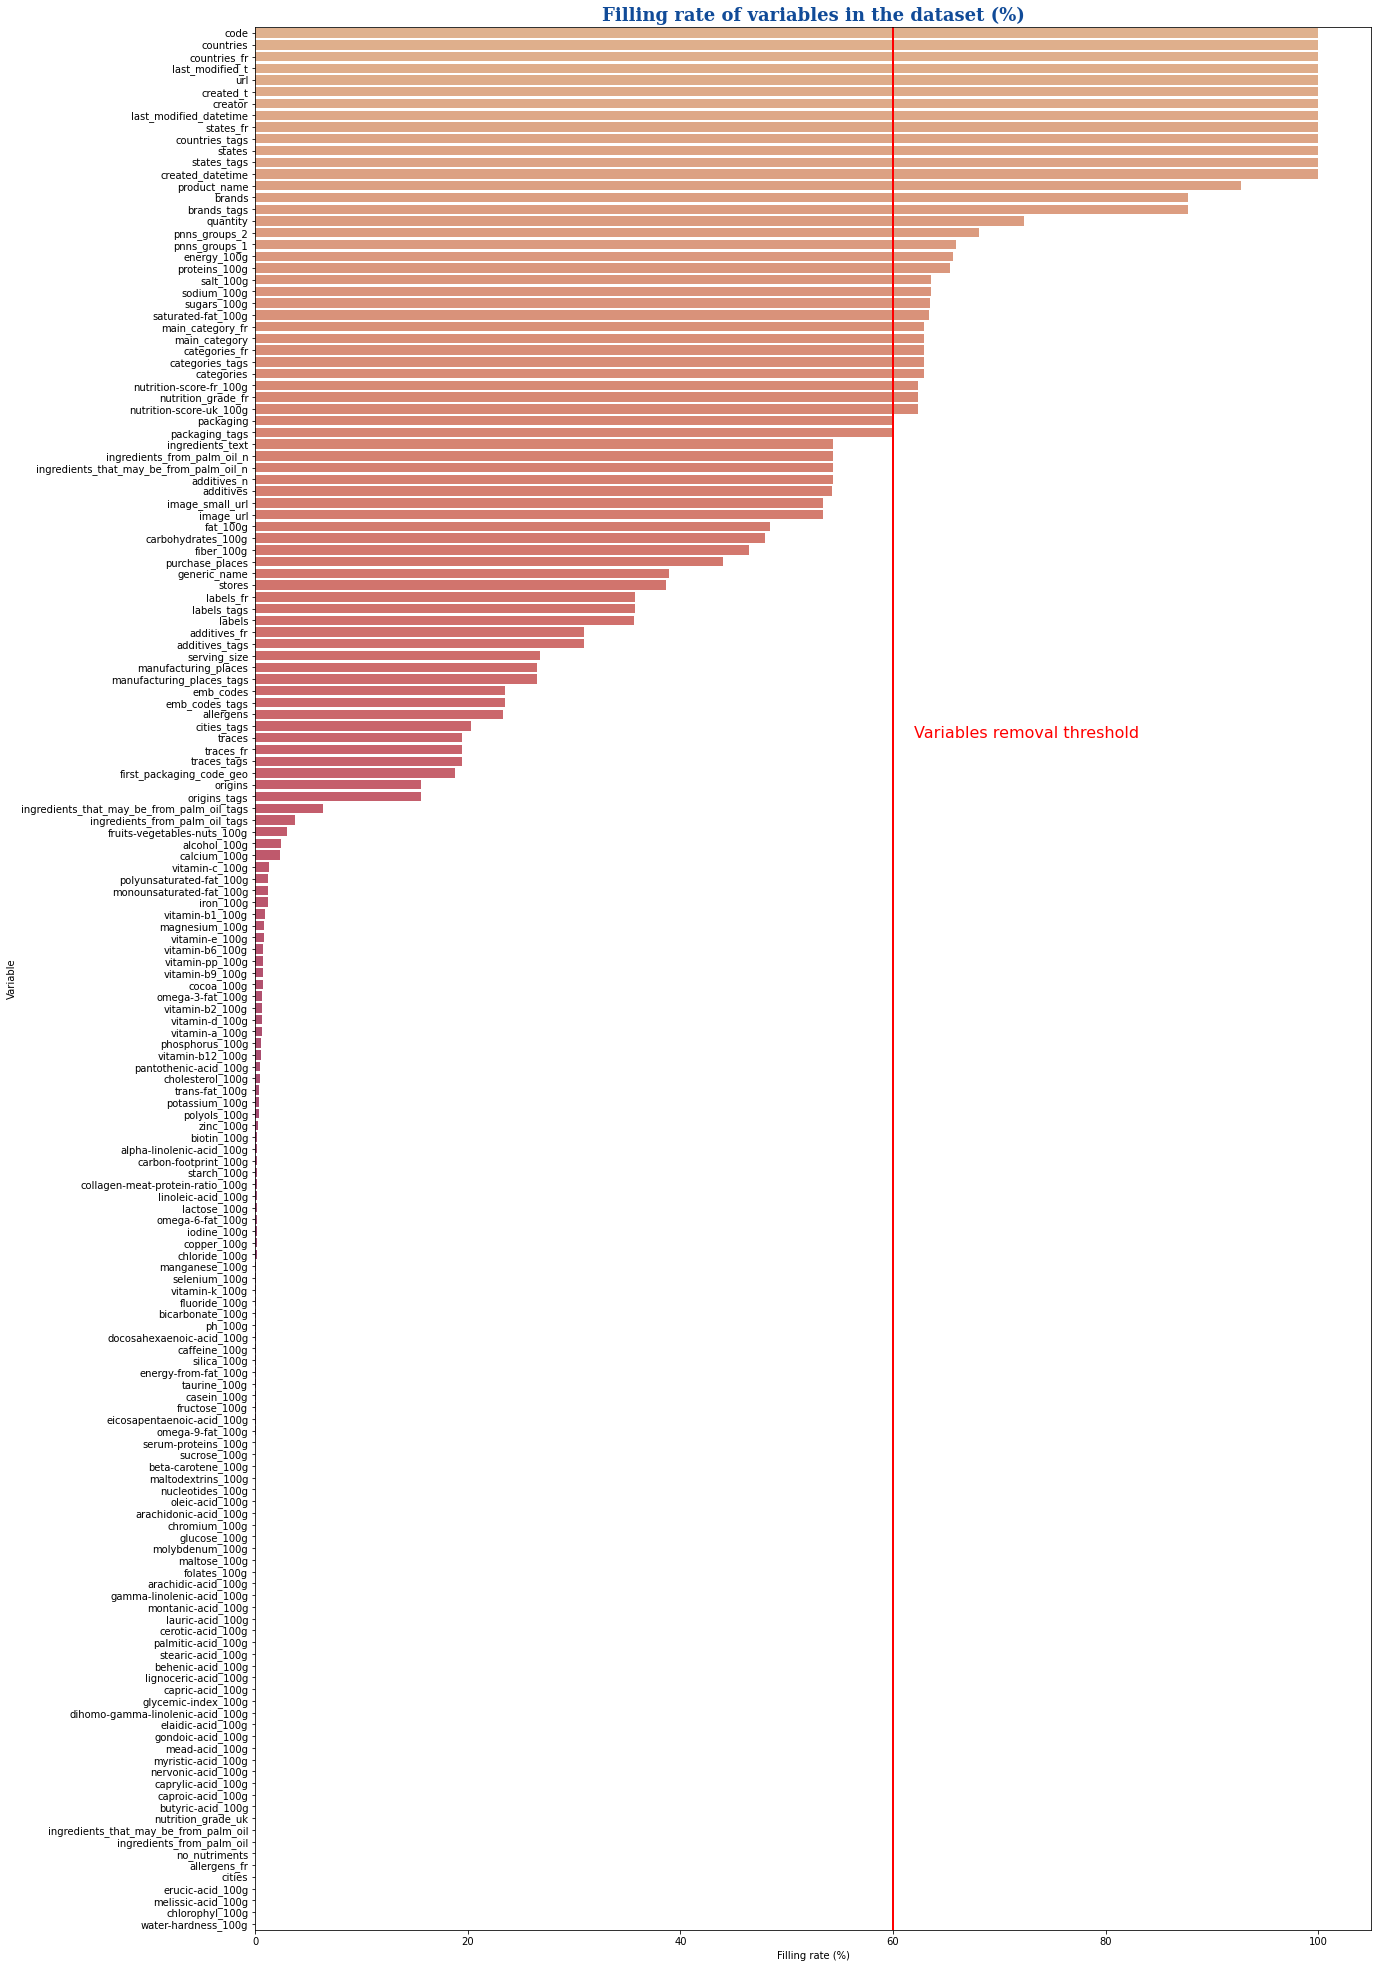

In [152]:
filling_features = null_factor(df_france, 0)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 

# Deletion threshold

sup_threshold = 60

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")

# Threshold for deleting variables 

plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 60, 'Variables removal threshold', fontsize = 16, color = 'r')

plt.title("Filling rate of variables in the dataset (%)", fontdict=font_title)
plt.xlabel("Filling rate (%)")

plt.show()

We delete the data that does not interest us.

In [153]:
# Create a copy of df_france to safely delete columns.

df_test_france = df_france.copy()

In [154]:
liste_col_gardee = ["pnns_groups_1", "pnns_groups_2", "nutrition-score-fr_100g", "nutrition-score-uk_100g"]

# Delete columns that are less than 60% full.

for i in df_test_france.columns.tolist():
  if i not in liste_col_gardee:
    remplissage_col = round((df_test_france[i].notnull().mean() * 100), 2)
    if remplissage_col < 60:
      df_test_france.drop([i], axis=1, inplace=True)
      print("This column has been removed:", i)
      #inplace = true --> keeps the info that the column has been deleted. Overwrite the info we had before and place the new info: dataframe minus the deleted column.

This column has been removed: generic_name
This column has been removed: packaging
This column has been removed: packaging_tags
This column has been removed: origins
This column has been removed: origins_tags
This column has been removed: manufacturing_places
This column has been removed: manufacturing_places_tags
This column has been removed: labels
This column has been removed: labels_tags
This column has been removed: labels_fr
This column has been removed: emb_codes
This column has been removed: emb_codes_tags
This column has been removed: first_packaging_code_geo
This column has been removed: cities
This column has been removed: cities_tags
This column has been removed: purchase_places
This column has been removed: stores
This column has been removed: ingredients_text
This column has been removed: allergens
This column has been removed: allergens_fr
This column has been removed: traces
This column has been removed: traces_tags
This column has been removed: traces_fr
This column ha

In [155]:
liste_col_suppr = ['quantity','countries_fr',"brands","creator", "created_t", "created_datetime", "last_modified_t",'last_modified_datetime','url', "brands_tags", "countries", "countries_tags", "states", "states_tags","categories_tags","states_fr",'main_category',"main_category_fr",'nutrition-score-uk_100g']

for i in df_test_france.columns.tolist():
  if i in liste_col_suppr:
    df_test_france.drop([i], axis=1, inplace=True)
    print("This column has been removed:", i)

This column has been removed: url
This column has been removed: creator
This column has been removed: created_t
This column has been removed: created_datetime
This column has been removed: last_modified_t
This column has been removed: last_modified_datetime
This column has been removed: quantity
This column has been removed: brands
This column has been removed: brands_tags
This column has been removed: categories_tags
This column has been removed: countries
This column has been removed: countries_tags
This column has been removed: countries_fr
This column has been removed: states
This column has been removed: states_tags
This column has been removed: states_fr
This column has been removed: main_category
This column has been removed: main_category_fr
This column has been removed: nutrition-score-uk_100g


In [156]:
# Update of the df_france with the modifications made in the df_test_france
df_france = df_test_france

In [157]:
# Reset index
df_france.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill="")

,code,product_name,categories,categories_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,3087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24600,Filet de bœuf,Filet de bœuf,Filet-de-boeuf,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36252,Lion Peanut x2,NaN,NaN,e,unknown,unknown,1883.0,12.5,57.5,2.5,0.09652,0.038,22.0
4,39259,Twix x2,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98435,9906410000009,Roussette du Bugey (2011),"Boissons,Boissons alcoolisées,Vins,Vins blancs...","Boissons,Boissons alcoolisées,Vins,Vins frança...",NaN,NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98436,99111250,Thé vert Earl grey,thés verts,"Aliments et boissons à base de végétaux,Boisso...",c,Beverages,Non-sugared beverages,21.0,0.2,0.5,0.5,0.02540,0.010,2.0
98437,9918,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98438,9935010000003,Rillette d'oie,"Viandes,Produits à tartiner,Charcuteries,Produ...","Viandes,Produits à tartiner,Charcuteries,Produ...",NaN,Fish Meat Eggs,Processed meat,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###2.4 Choice of category operated

In [158]:
df_france['pnns_groups_1'].value_counts()

unknown                    12498
Sugary snacks               9407
Fish Meat Eggs              6768
Beverages                   6597
Milk and dairy products     6421
Cereals and potatoes        6128
Composite foods             6046
Fruits and vegetables       4077
Fat and sauces              3794
Salty snacks                2122
fruits-and-vegetables        549
sugary-snacks                472
cereals-and-potatoes           2
Name: pnns_groups_1, dtype: int64

In [159]:
df_france['pnns_groups_2'].value_counts()

unknown                             12498
One-dish meals                       4946
Biscuits and cakes                   3764
Sweets                               3427
Cereals                              3045
Cheese                               3026
Processed meat                       2905
Non-sugared beverages                2885
Dressings and sauces                 2610
Chocolate products                   2216
Fish and seafood                     2185
Alcoholic beverages                  2092
Milk and yogurt                      2058
Vegetables                           1772
Sweetened beverages                  1660
Appetizers                           1627
Fruit juices                         1531
Fruits                               1501
Meat                                 1357
Bread                                1321
Fats                                 1184
Breakfast cereals                    1111
Dairy desserts                        747
Sandwich                          

There are more different values in pnns-groups_2, so that's the column we'll keep.
We also see that there is the same number of occurrences of unknown. We will assume that this value is common to both columns.

In [160]:
index = df_france[ df_france['pnns_groups_1']=='unknown' ].index
df_france.drop(index, inplace=True)

In [161]:
df_france['pnns_groups_2'].value_counts()

One-dish meals                      4946
Biscuits and cakes                  3764
Sweets                              3427
Cereals                             3045
Cheese                              3026
Processed meat                      2905
Non-sugared beverages               2885
Dressings and sauces                2610
Chocolate products                  2216
Fish and seafood                    2185
Alcoholic beverages                 2092
Milk and yogurt                     2058
Vegetables                          1772
Sweetened beverages                 1660
Appetizers                          1627
Fruit juices                        1531
Fruits                              1501
Meat                                1357
Bread                               1321
Fats                                1184
Breakfast cereals                   1111
Dairy desserts                       747
Sandwich                             644
Ice cream                            590
Legumes         

We see that pnns_groupe2 no longer has 'unknown', which shows that the two matched well.
We can therefore delete pnns_groupe1 which has less information.

In [162]:
df_france.drop('pnns_groups_1', axis=1, inplace = True)

In the same way we will delete the lines giving no information for pnns_groupe_2.

In [163]:
df_france['pnns_groups_2'].isna().value_counts()

False    54540
True     31402
Name: pnns_groups_2, dtype: int64

That's a lot of lines to delete but we still have more than 50000, which is enough for what we want to do next.

In [164]:
index2 = df_france[df_france['pnns_groups_2'].isna()].index
df_france.drop(index2, inplace=True)

We are now dealing with "categories" and "categories_fr".

In [165]:
df_france['categories'].value_counts()

Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                                                                                                                                                            291
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                                                                                                                                                       242
Biscuits                                                                                                                                                                                                                                                                                              222
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de 

In [166]:
df_france['categories_fr'].value_counts()

Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                                      580
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                                 440
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner                428
Snacks sucrés,Chocolats,Chocolats noirs                                                                                                                                         427
Snacks sucrés,Confiseries,Bonbons                                                                                                                                               384
                                                                                                    

We drop categories_fr which is less filled, and which can be confusing.

In [167]:
df_france.drop('categories_fr', axis=1, inplace = True)

In [168]:
df_france

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
182,5200016,lentilles vertes,"Aliments et boissons à base de végétaux,Alimen...",NaN,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,7730009,Biscuits sablés fourrage au cacao,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",NaN,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,9336247,NaN,Bonbons,NaN,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,10090206,Thé de Noël aromatisé orange-cannelle,"Aliments et boissons à base de végétaux,Boisso...",NaN,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,40608754,"Pepsi, Nouveau goût !",Sodas au cola,e,Sweetened beverages,177.0,0.0,10.4,0.0,0.0254,0.01,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
320755,988639,NaN,fr:Pâtes à tartiner aux noisettes et au cacao,NaN,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320758,9900010011557,Miel de Camargue,Miels français,NaN,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9906410000009,Roussette du Bugey (2011),"Boissons,Boissons alcoolisées,Vins,Vins blancs...",NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,Thé vert Earl grey,thés verts,c,Non-sugared beverages,21.0,0.2,0.5,0.5,0.0254,0.01,2.0


###2.5 Study of correlations and choices concerning the "sodium_100g" and "salt_100g" columns.

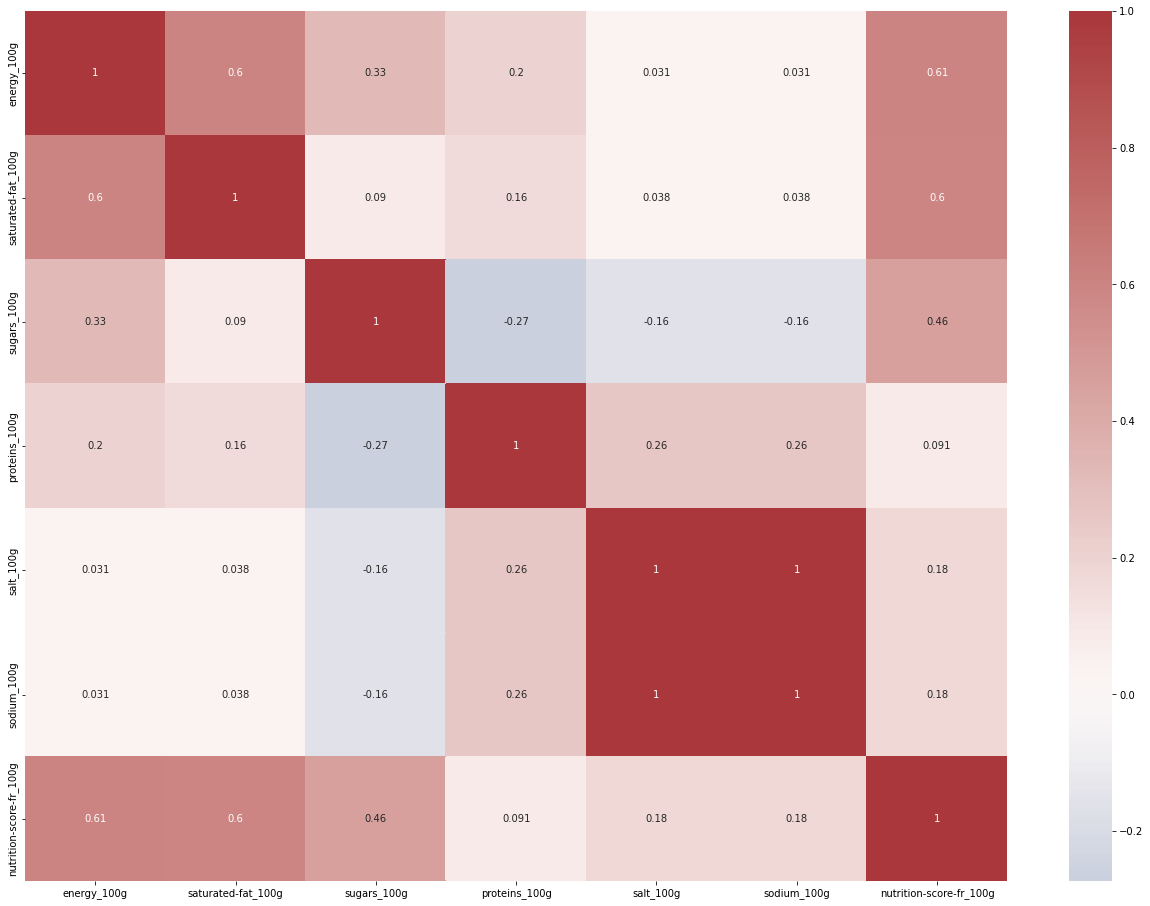

In [169]:
plt.figure(figsize = (22, 16))

sns.color_palette("vlag", as_cmap=True)
main_map = sns.heatmap(df_france.corr(), cmap="vlag", center=0, annot=True)


plt.show()

In [170]:
'''
This function gives information to help decide which feature to keep, in the case where there are 2 features that seem to correspond to the same notion.

It gives 3 pieces of information:
% of cases where the value of column 1 is filled in, but not 2
% of cases where the value of column 2 is filled in, but not 1
% of cases where values in column 1 and 2 are both filled in

Function made by François BOYER

'''

def compare_na(df, col1, col2):
    num_rows, num_cols = df.shape
    
    col1notnull_col2null = round ( ( ( ( df[ (df[col1].notnull()) & ( df[col2].isna() ) ][[col1,col2]].shape[0] ) / num_rows ) * 100), 5)
    col2notnull_col1null = round ( ( ( ( df[ (df[col2].notnull()) & ( df[col1].isna() ) ][[col1,col2]].shape[0] ) / num_rows ) * 100), 5)
    col1notnull_col2notnull = round ( ( ( ( df[ (df[col1].notnull()) & ( df[col2].notnull() ) ][[col1,col2]].shape[0] ) / num_rows ) * 100), 5)
    
    print(f'Case where {col1} is filled in but not {col2}: {col1notnull_col2null}%')
    print(f'Case where {col2} is filled in but not {col1}:{col2notnull_col1null}%')
    print(f'Case where {col1} and {col2} are both filled in: {col1notnull_col2notnull}%')

In [171]:
compare_na(df_france, 'sodium_100g', 'salt_100g')

Case where sodium_100g is filled in but not salt_100g: 0.0%
Case where salt_100g is filled in but not sodium_100g:0.00367%
Case where sodium_100g and salt_100g are both filled in: 75.04584%


As seen on the heatmap, we see that not only are sodium and salt very strongly correlated, but when the sodium level is entered, so is the salt level. We can therefore dispense with this information.

In [172]:
df_france.drop('sodium_100g', axis=1, inplace = True)

In [173]:
# Creation of a new backup DF.

df_france_clean = df_france.copy()

In [174]:
df_france_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54540 entries, 182 to 320765
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     54540 non-null  object 
 1   product_name             54213 non-null  object 
 2   categories               54540 non-null  object 
 3   nutrition_grade_fr       40100 non-null  object 
 4   pnns_groups_2            54540 non-null  object 
 5   energy_100g              42611 non-null  float64
 6   saturated-fat_100g       40801 non-null  float64
 7   sugars_100g              40885 non-null  float64
 8   proteins_100g            42381 non-null  float64
 9   salt_100g                40932 non-null  float64
 10  nutrition-score-fr_100g  40100 non-null  float64
dtypes: float64(6), object(5)
memory usage: 5.0+ MB


##3. Vegetarian foods

In [175]:
# Creation of the "vegetarian" column.

df_france_clean["vegetarian"] = True

df_france_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54540 entries, 182 to 320765
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     54540 non-null  object 
 1   product_name             54213 non-null  object 
 2   categories               54540 non-null  object 
 3   nutrition_grade_fr       40100 non-null  object 
 4   pnns_groups_2            54540 non-null  object 
 5   energy_100g              42611 non-null  float64
 6   saturated-fat_100g       40801 non-null  float64
 7   sugars_100g              40885 non-null  float64
 8   proteins_100g            42381 non-null  float64
 9   salt_100g                40932 non-null  float64
 10  nutrition-score-fr_100g  40100 non-null  float64
 11  vegetarian               54540 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 5.0+ MB


Filling the ```vegetarian``` column

We rely on ```pnns_groups_2``` to define whether a food is vegetarian or not because it is the group that has the most different entries and therefore allows us to be more precise. There are bound to be errors:
* Ex: *pizza pies and quiche* which will be classified as non-vegetarian, although there are probably vegetarian products in this category.

In [176]:
liste_pas_vege =["Meat","Processed meat","Fish and seafood","One-dish meals","Sandwich","Pizza pies and quiche","Tripe dishes"]

for col in liste_pas_vege: 
        df_france_clean["vegetarian"] = np.where(df_france_clean["pnns_groups_2"].str.contains(col, na=True), False, df_france_clean["vegetarian"])

df_france_clean

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian
182,5200016,lentilles vertes,"Aliments et boissons à base de végétaux,Alimen...",NaN,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,True
184,7730009,Biscuits sablés fourrage au cacao,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",NaN,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,True
187,9336247,NaN,Bonbons,NaN,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,True
188,10090206,Thé de Noël aromatisé orange-cannelle,"Aliments et boissons à base de végétaux,Boisso...",NaN,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,True
226,40608754,"Pepsi, Nouveau goût !",Sodas au cola,e,Sweetened beverages,177.0,0.0,10.4,0.0,0.0254,13.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
320755,988639,NaN,fr:Pâtes à tartiner aux noisettes et au cacao,NaN,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,True
320758,9900010011557,Miel de Camargue,Miels français,NaN,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,True
320761,9906410000009,Roussette du Bugey (2011),"Boissons,Boissons alcoolisées,Vins,Vins blancs...",NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,True
320763,99111250,Thé vert Earl grey,thés verts,c,Non-sugared beverages,21.0,0.2,0.5,0.5,0.0254,2.0,True


In [177]:
df_france_clean["vegetarian"].value_counts()

True     41982
False    12558
Name: vegetarian, dtype: int64

In [178]:
df_france_clean['vegetarian'].dtype

dtype('bool')

We observe that some non-vegetarian products are still in the list, so we try to refine the result.

In [179]:
df_france_clean[df_france_clean["vegetarian"] == True] ["categories"].tolist()

["Aliments et boissons à base de végétaux,Aliments d'origine végétale,Légumineuses et dérivés,Céréales et pommes de terre,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles vertes",
 'Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés',
 'Bonbons',
 "Aliments et boissons à base de végétaux,Boissons,Aliments d'origine végétale,Boissons chaudes,Infusions,Thés,Thés noirs,Boissons non sucrées,Thés noirs aromatisés,Thés aromatisés",
 'Sodas au cola',
 'Sodas au citron,Boissons sucrées',
 'Snacks sucrés,Desserts,Biscuits et gâteaux,Gâteaux,Madeleines',
 'Cakes aux raisins,Cakes,Gâteaux',
 'Snacks sucrés,Desserts,Biscuits et gâteaux,Gâteaux,Pâtisseries,Cakes aux fruits',
 'Snacks sucrés,Biscuits et gâteaux,Desserts,Gâteaux,Pâtisseries,Financiers',
 'Snacks sucrés,Biscuits et gâteaux,Desserts,Gâteaux,Pâtisseries,Gâteaux au citron',
 'Soda',
 'Gâteaux,Goûters individuels',
 'Cookies',
 'Cookies',
 'Cookies',
 'Gâteaux fourrés,Pâtisseries,Gâteaux au chocolat',
 "Aliments et boiss

In [180]:
list_unvegie = ["volaille", "poulet", "boeuf", "viande"]

for i in list_unvegie: 
        df_france_clean["vegetarian"] = np.where(df_france_clean["categories"].str.contains(i, na=True), False, df_france_clean["vegetarian"])

df_france_clean

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian
182,5200016,lentilles vertes,"Aliments et boissons à base de végétaux,Alimen...",NaN,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,True
184,7730009,Biscuits sablés fourrage au cacao,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",NaN,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,True
187,9336247,NaN,Bonbons,NaN,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,True
188,10090206,Thé de Noël aromatisé orange-cannelle,"Aliments et boissons à base de végétaux,Boisso...",NaN,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,True
226,40608754,"Pepsi, Nouveau goût !",Sodas au cola,e,Sweetened beverages,177.0,0.0,10.4,0.0,0.0254,13.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
320755,988639,NaN,fr:Pâtes à tartiner aux noisettes et au cacao,NaN,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,True
320758,9900010011557,Miel de Camargue,Miels français,NaN,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,True
320761,9906410000009,Roussette du Bugey (2011),"Boissons,Boissons alcoolisées,Vins,Vins blancs...",NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,True
320763,99111250,Thé vert Earl grey,thés verts,c,Non-sugared beverages,21.0,0.2,0.5,0.5,0.0254,2.0,True


In [181]:
df_france_clean[df_france_clean["product_name"] == "Nouilles à la Chinoise au poulet"]

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian
230091,3386030001598,Nouilles à la Chinoise au poulet,"Aliments et boissons à base de végétaux,Alimen...",a,Cereals,552.0,0.8,0.9,7.6,0.94,-1.0,True


Création d'une nouvelle colonne, pour remplacer les True/False par 1 et 0.

In [182]:
df_france_clean["vegetarian_bin"] = df_france_clean["vegetarian"]

In [183]:
df_france_clean["vegetarian_bin"] = df_france_clean["vegetarian_bin"].astype(bool).astype(str)

In [184]:
df_france_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54540 entries, 182 to 320765
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     54540 non-null  object 
 1   product_name             54213 non-null  object 
 2   categories               54540 non-null  object 
 3   nutrition_grade_fr       40100 non-null  object 
 4   pnns_groups_2            54540 non-null  object 
 5   energy_100g              42611 non-null  float64
 6   saturated-fat_100g       40801 non-null  float64
 7   sugars_100g              40885 non-null  float64
 8   proteins_100g            42381 non-null  float64
 9   salt_100g                40932 non-null  float64
 10  nutrition-score-fr_100g  40100 non-null  float64
 11  vegetarian               54540 non-null  bool   
 12  vegetarian_bin           54540 non-null  object 
dtypes: bool(1), float64(6), object(6)
memory usage: 5.5+ MB


In [185]:
df_france_clean["vegetarian_bin"].replace({"True" : "0", "False" : "1"}, inplace=True)

In [186]:
df_france_clean["vegetarian_bin"] = df_france_clean["vegetarian_bin"].astype(str).astype(int)


df_france_clean.head()

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian,vegetarian_bin
182,5200016,lentilles vertes,"Aliments et boissons à base de végétaux,Alimen...",NaN,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,True,0
184,7730009,Biscuits sablés fourrage au cacao,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",NaN,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,True,0
187,9336247,NaN,Bonbons,NaN,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,True,0
188,10090206,Thé de Noël aromatisé orange-cannelle,"Aliments et boissons à base de végétaux,Boisso...",NaN,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,True,0
226,40608754,"Pepsi, Nouveau goût !",Sodas au cola,e,Sweetened beverages,177.0,0.0,10.4,0.0,0.0254,13.0,True,0


In [187]:
df_france_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54540 entries, 182 to 320765
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     54540 non-null  object 
 1   product_name             54213 non-null  object 
 2   categories               54540 non-null  object 
 3   nutrition_grade_fr       40100 non-null  object 
 4   pnns_groups_2            54540 non-null  object 
 5   energy_100g              42611 non-null  float64
 6   saturated-fat_100g       40801 non-null  float64
 7   sugars_100g              40885 non-null  float64
 8   proteins_100g            42381 non-null  float64
 9   salt_100g                40932 non-null  float64
 10  nutrition-score-fr_100g  40100 non-null  float64
 11  vegetarian               54540 non-null  bool   
 12  vegetarian_bin           54540 non-null  int64  
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 5.5+ MB


<function matplotlib.pyplot.show>

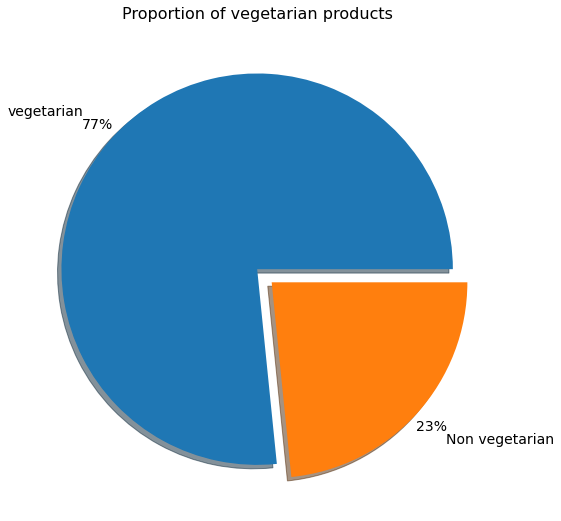

In [188]:
# Pie chart display
plt.figure(figsize=(10,9))

plt.title('Proportion of vegetarian products', size =16)

vege = df_france_clean["vegetarian"].value_counts()

vegetarian = vege[True]
non_vegetarian = vege[False]

sizes = [vegetarian, non_vegetarian]
labels = 'vegetarian', 'Non vegetarian'

plt.pie(sizes, explode=(0, 0.1),  labels=labels, autopct='%1.0f%%',textprops={'fontsize': 14}, pctdistance=1.1, labeldistance=1.2, shadow=True, startangle=0)

plt.show

## 4. Final cleanings

###4.1 Removing products with too little informations

In [189]:
# Count the number of missing values for the row and store in a new column.
df_france_clean['NB_NAN'] = df_france_clean.isna().sum(axis=1)

In [190]:
# Sort rows by number of missing values.
df_france_clean['NB_NAN'].value_counts()

0    39954
7    11455
5     1432
3      609
4      320
6      260
8      226
2      193
1       91
Name: NB_NAN, dtype: int64

Products with 7 NaN have no interest, because even if we replace the values they will not allow us to make useful selections. We would indeed have 11,455 products whose nutritional values will be those of their category, with no way of differentiating them.

In [191]:
# Removal of all indicators whose NB_NAN is 4 or more.
indexNames = df_france_clean[ (df_france_clean['NB_NAN'] >= 7)].index
df_france_clean.drop(indexNames , inplace=True)

In [192]:
# Removal of the NB_NAN column.
df_france_clean = df_france_clean.drop('NB_NAN', axis=1)

###4.2 Outlier management

For the nutritional indicators, the values are between 0 and 100, with the exception of the energy variable.

In [193]:
# Here we take the nutritional values which must be between 0 and 100.

Nutritives_values_Series = ['saturated-fat_100g','sugars_100g','proteins_100g','salt_100g']

In [194]:
# Remove rows containing outliers for columns containing nutrient values.

def delete_outliers(data: pd.DataFrame, Nutritives_values_Series: list):
    for col in Nutritives_values_Series: 
        data.loc[:,col] = data[col].where(data[col] >= 0)
        data.loc[:,col] = data[col].where(data[col] <= 100)
    return(data)

In [195]:
delete_outliers(df_france_clean, Nutritives_values_Series)

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian,vegetarian_bin
226,40608754,"Pepsi, Nouveau goût !",Sodas au cola,e,Sweetened beverages,177.0,0.00,10.40,0.000,0.0254,13.0,True,0
240,87177756,7Up,"Sodas au citron,Boissons sucrées",e,Sweetened beverages,177.0,0.00,10.40,0.000,0.1000,13.0,True,0
242,10,Madeleines nature,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",d,Biscuits and cakes,1900.0,2.50,26.00,6.000,0.6600,12.0,True,0
279,30,Cakes Raisins,"Cakes aux raisins,Cakes,Gâteaux",d,Biscuits and cakes,1768.0,2.50,28.00,5.800,0.6500,13.0,True,0
283,31,Cakes aux Fruits,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",d,Biscuits and cakes,1670.0,2.00,34.00,4.900,0.6000,12.0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320681,96068779,Spearmint sans sucres,Bonbons,c,Sweets,1017.0,1.28,0.12,0.040,0.0050,4.0,True,0
320702,96118580,Fisherman's Friend Miel-Citron,"Bonbons,Pastilles",b,Sweets,1031.0,1.28,0.10,0.004,0.0010,2.0,True,0
320734,9778564312457,Nature cheddar and red onion crisps,Crisps,c,Appetizers,2155.0,3.40,1.80,7.800,1.3500,9.0,True,0
320751,9847548283004,Tartines craquantes bio au sarrasin,"Biscottes au sarrasin,Biscottes",a,Bread,1643.0,0.60,2.60,13.000,0.6800,-4.0,True,0


For the values 'energy_100g' the management of outliers is different.

Indeed, the maximum energy densities for 100g are 3700 kJ/100g
(source: https://en.wikipedia.org/wiki/Food_energy).
We are therefore going to delete all the lines whose energy_100g variable is greater than 3700 (or 900 kcal/100g).

In [196]:
df_france_clean = df_france_clean[~((df_france_clean['energy_100g'] > 3700))]

##5. NaN management

###5.1 NaN management of nutritional values

Exploiting the mean and the median is faster, but it is not the most efficient.

We would need a criterion to determine the most efficient method of imputation.

Here we will replace the NaN of each line/product with the KNNImputer method. More interesting for us because it takes into account the product groups and the similarities between the other columns.

In [197]:
# Generation of a new dataframe in order to keep the one we worked on previously intact.
df_france_test = df_france_clean.copy()

# Reset index.
df_france_test =df_france_test.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill="")

df_france_test

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian,vegetarian_bin
0,40608754,"Pepsi, Nouveau goût !",Sodas au cola,e,Sweetened beverages,177.0,0.00,10.40,0.000,0.0254,13.0,True,0
1,87177756,7Up,"Sodas au citron,Boissons sucrées",e,Sweetened beverages,177.0,0.00,10.40,0.000,0.1000,13.0,True,0
2,10,Madeleines nature,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",d,Biscuits and cakes,1900.0,2.50,26.00,6.000,0.6600,12.0,True,0
3,30,Cakes Raisins,"Cakes aux raisins,Cakes,Gâteaux",d,Biscuits and cakes,1768.0,2.50,28.00,5.800,0.6500,13.0,True,0
4,31,Cakes aux Fruits,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",d,Biscuits and cakes,1670.0,2.00,34.00,4.900,0.6000,12.0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42758,96068779,Spearmint sans sucres,Bonbons,c,Sweets,1017.0,1.28,0.12,0.040,0.0050,4.0,True,0
42759,96118580,Fisherman's Friend Miel-Citron,"Bonbons,Pastilles",b,Sweets,1031.0,1.28,0.10,0.004,0.0010,2.0,True,0
42760,9778564312457,Nature cheddar and red onion crisps,Crisps,c,Appetizers,2155.0,3.40,1.80,7.800,1.3500,9.0,True,0
42761,9847548283004,Tartines craquantes bio au sarrasin,"Biscottes au sarrasin,Biscottes",a,Bread,1643.0,0.60,2.60,13.000,0.6800,-4.0,True,0


Observation of the distribution of data on columns of nutritional values before change.

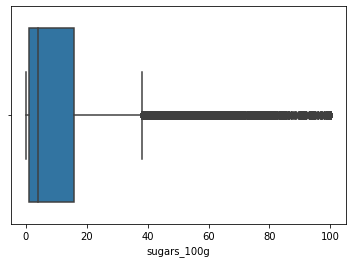

In [198]:
sns.boxplot(x=df_france_test["sugars_100g"])

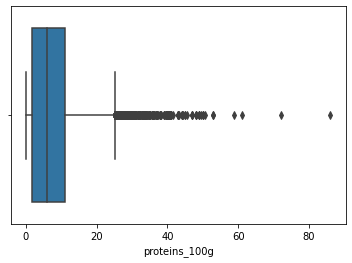

In [199]:
sns.boxplot(x=df_france_test["proteins_100g"])

In [200]:
df_france_test_KNN = pd.DataFrame([])

df_france_test_KNN['energy_100g'] = df_france_test['energy_100g']
df_france_test_KNN['saturated-fat_100g'] =df_france_test['saturated-fat_100g']
df_france_test_KNN['sugars_100g'] =df_france_test['sugars_100g']
df_france_test_KNN['proteins_100g'] =df_france_test['proteins_100g']
df_france_test_KNN['salt_100g'] =df_france_test['salt_100g']
df_france_test_KNN['nutrition-score-fr_100g'] =df_france_test['nutrition-score-fr_100g']

df_france_test_KNN

,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,177.0,0.00,10.40,0.000,0.0254,13.0
1,177.0,0.00,10.40,0.000,0.1000,13.0
2,1900.0,2.50,26.00,6.000,0.6600,12.0
3,1768.0,2.50,28.00,5.800,0.6500,13.0
4,1670.0,2.00,34.00,4.900,0.6000,12.0
...,...,...,...,...,...,...
42758,1017.0,1.28,0.12,0.040,0.0050,4.0
42759,1031.0,1.28,0.10,0.004,0.0010,2.0
42760,2155.0,3.40,1.80,7.800,1.3500,9.0
42761,1643.0,0.60,2.60,13.000,0.6800,-4.0


In [201]:
# We look at the number of NaN before for the category 'Sweetened beverages'.
df_france_test[df_france_test["pnns_groups_2"] == 'Sweetened beverages'].isna().sum()

code                         0
product_name                 2
categories                   0
nutrition_grade_fr         115
pnns_groups_2                0
energy_100g                  3
saturated-fat_100g          89
sugars_100g                 51
proteins_100g               34
salt_100g                   78
nutrition-score-fr_100g    115
vegetarian                   0
vegetarian_bin               0
dtype: int64

In [202]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

df_france_test_KNN= imputer.fit_transform(df_france_test_KNN)

In [203]:
# We check that the size matches.
df_france_test_KNN.shape

(42763, 6)

In [204]:
# You can add columns to the initialization.
df_france_test_KNN2 = pd.DataFrame(df_france_test_KNN)
df_france_test_KNN2

,0,1,2,3,4,5
0,177.0,0.00,10.40,0.000,0.0254,13.0
1,177.0,0.00,10.40,0.000,0.1000,13.0
2,1900.0,2.50,26.00,6.000,0.6600,12.0
3,1768.0,2.50,28.00,5.800,0.6500,13.0
4,1670.0,2.00,34.00,4.900,0.6000,12.0
...,...,...,...,...,...,...
42758,1017.0,1.28,0.12,0.040,0.0050,4.0
42759,1031.0,1.28,0.10,0.004,0.0010,2.0
42760,2155.0,3.40,1.80,7.800,1.3500,9.0
42761,1643.0,0.60,2.60,13.000,0.6800,-4.0


In [205]:
df_france_test_KNN2.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [206]:
df_france_test_KNN2.columns = ['energy_100g','saturated-fat_100g','sugars_100g','proteins_100g','salt_100g','nutrition-score-fr_100g']

In [207]:
df_france_test_KNN2

,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,177.0,0.00,10.40,0.000,0.0254,13.0
1,177.0,0.00,10.40,0.000,0.1000,13.0
2,1900.0,2.50,26.00,6.000,0.6600,12.0
3,1768.0,2.50,28.00,5.800,0.6500,13.0
4,1670.0,2.00,34.00,4.900,0.6000,12.0
...,...,...,...,...,...,...
42758,1017.0,1.28,0.12,0.040,0.0050,4.0
42759,1031.0,1.28,0.10,0.004,0.0010,2.0
42760,2155.0,3.40,1.80,7.800,1.3500,9.0
42761,1643.0,0.60,2.60,13.000,0.6800,-4.0


In [208]:
df_france_test['energy_100g'] = df_france_test_KNN2['energy_100g']
df_france_test['saturated-fat_100g'] = df_france_test_KNN2['saturated-fat_100g']
df_france_test['sugars_100g'] = df_france_test_KNN2['sugars_100g']
df_france_test['proteins_100g'] = df_france_test_KNN2['proteins_100g']
df_france_test['salt_100g'] = df_france_test_KNN2['salt_100g']
df_france_test['nutrition-score-fr_100g'] = df_france_test_KNN2['nutrition-score-fr_100g']

In [209]:
df_france_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42763 entries, 0 to 42762
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     42763 non-null  object 
 1   product_name             42664 non-null  object 
 2   categories               42763 non-null  object 
 3   nutrition_grade_fr       40011 non-null  object 
 4   pnns_groups_2            42763 non-null  object 
 5   energy_100g              42763 non-null  float64
 6   saturated-fat_100g       42763 non-null  float64
 7   sugars_100g              42763 non-null  float64
 8   proteins_100g            42763 non-null  float64
 9   salt_100g                42763 non-null  float64
 10  nutrition-score-fr_100g  42763 non-null  float64
 11  vegetarian               42763 non-null  bool   
 12  vegetarian_bin           42763 non-null  int64  
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 4.0+ MB


We observe the new distribution of data. It is almost similar to the original, so our method is acceptable.

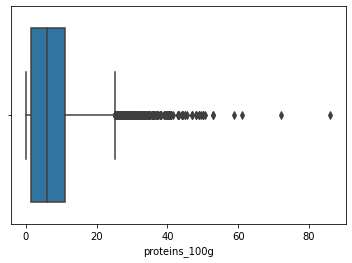

In [210]:
sns.boxplot(x=df_france_test["proteins_100g"])

We observe that all the columns are filled with the exception of "product_name" and "nutrition_grade_fr".

###5.2 Management of the "nutrition_grade_fr" column

We therefore observe that there are a lot of missing values in “nutrition_grade_fr”. However, this column is easy to complete since we have the value of the "nutrition-score-fr_100g" column and we know the calculation of the nutri-score:
https://quoidansmonplate.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/

As well as the terms for assigning a letter that summarizes the nutritional quality:
* Min à -1 : A
* 0 à 2 : B
* 3 à 10 : C
* 11 à 18 : D
* 19 à max : E

In [211]:
df_france_test["nutrition_grade_fr"].value_counts()

d    10982
c     8561
e     7711
a     7145
b     5612
Name: nutrition_grade_fr, dtype: int64

In [212]:
df_france_test[df_france_test["nutrition_grade_fr"].isnull()]

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian,vegetarian_bin
28,13935620236,Boisson au soja,"Boissons,Boissons sucrées",NaN,Sweetened beverages,235.2,0.20,8.20,2.0,0.08636,2.5,True,0
37,14113230018,Almonds,"Aliments et boissons à base de végétaux,Alimen...",NaN,Dried fruits,2406.0,3.70,3.90,21.2,0.00625,9.0,True,0
49,14816001007,Vinaigre basalmique bio,"Vinaigres,Vinaigres balsamiques",NaN,Dressings and sauces,444.9,0.00,19.90,0.7,2.66000,15.0,True,0
120,38900719609,Sunny fruit,Fruit frais,NaN,Fruits,256.0,0.10,14.00,11.5,0.10000,-5.0,True,0
144,44738201964,Yellow Curry Paste,"Curry Paste,Yellow Curry Paste",NaN,Dressings and sauces,628.0,0.35,10.00,10.0,14.47800,11.5,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42727,9555022300009,Nouilles orientales arôme de boeuf 85 g - Mamee,"Plats préparés,Soupes,Soupes déshydratées,Cuis...",NaN,One-dish meals,1848.0,9.30,10.20,10.0,3.06324,21.5,False,1
42728,9555022300016,Nouilles orientales arôme de poulet - 85 g - M...,"Nouilles asiatiques,Nouilles instantanées,Noui...",NaN,One-dish meals,1806.0,8.90,8.30,10.2,3.94970,13.0,False,1
42729,9555022300023,Nouilles orientales au curry - 85 g - Mamee,"Nouilles asiatiques,Nouilles instantanées,Noui...",NaN,One-dish meals,1806.0,10.00,8.20,9.6,3.16230,13.0,False,1
42730,9555022300030,Nouilles orientales arôme de champignons - 85 ...,"Nouilles asiatiques,Nouilles instantanées,Noui...",NaN,One-dish meals,1602.0,8.30,6.50,8.4,3.99796,17.5,False,1


In [213]:
def nutriscore_filling(score_value):

  if score_value < 0:
    return "a"      
  elif (score_value >= 0) and (score_value < 3):
    return "b"
  elif (score_value >= 3) and (score_value <= 10):
    return "c"
  elif (score_value >= 11) and (score_value <= 18):
    return "d"
  else :
    return "e"

# Since we put returns in our condition, there is no need to put any at the end of the function.

In [214]:
df_france_test["nutrition_grade_fr"] = df_france_test.apply(lambda x: 
                                                            nutriscore_filling(x["nutrition-score-fr_100g"]) 
                                                            if pd.isnull(x["nutrition_grade_fr"]) else x["nutrition_grade_fr"] , axis=1)
# x in the lambda represents the dataframe.

In [215]:
df_france_test[df_france_test["nutrition_grade_fr"].isnull()]

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian,vegetarian_bin


In [216]:
df_france_test.head(30)

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian,vegetarian_bin
0,40608754,"Pepsi, Nouveau goût !",Sodas au cola,e,Sweetened beverages,177.0,0.0,10.4,0.00,0.02540,13.0,True,0
1,87177756,7Up,"Sodas au citron,Boissons sucrées",e,Sweetened beverages,177.0,0.0,10.4,0.00,0.10000,13.0,True,0
2,10,Madeleines nature,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",d,Biscuits and cakes,1900.0,2.5,26.0,6.00,0.66000,12.0,True,0
3,30,Cakes Raisins,"Cakes aux raisins,Cakes,Gâteaux",d,Biscuits and cakes,1768.0,2.5,28.0,5.80,0.65000,13.0,True,0
4,31,Cakes aux Fruits,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",d,Biscuits and cakes,1670.0,2.0,34.0,4.90,0.60000,12.0,True,0
5,50,Financiers aux Amandes,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",e,Biscuits and cakes,1868.0,10.0,39.0,8.00,0.55000,22.0,True,0
6,51,Fondants Citron,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",e,Biscuits and cakes,1896.0,10.0,37.0,8.10,0.78000,22.0,True,0
7,104,30 Panach' Fruits,"Gâteaux,Goûters individuels",d,Biscuits and cakes,1724.0,2.0,31.0,5.00,0.63000,13.0,True,0
8,11693,All Buter Belgian White Chocolate Chunk Cookies,Cookies,e,Biscuits and cakes,2172.0,17.0,33.5,5.50,1.00000,26.0,True,0
9,11778,Stem Ginger Cookies,Cookies,d,Biscuits and cakes,1809.0,7.0,35.7,6.10,0.83000,18.0,True,0


##6. KNN-Nearest Neighbors method for determining vegetarian equivalent

###6.1 Data standardization

In [217]:
from sklearn.preprocessing import MinMaxScaler

# We create a dataset for the reduced centered products.
df_france_scale = df_france_test.copy()

df_france_scale_value = pd.DataFrame([])
df_france_scale_value['energy_100g'] = df_france_test['energy_100g']
df_france_scale_value['saturated-fat_100g'] = df_france_test['saturated-fat_100g']
df_france_scale_value['sugars_100g'] = df_france_test['sugars_100g']
df_france_scale_value['proteins_100g'] = df_france_test['proteins_100g']
df_france_scale_value['salt_100g'] = df_france_test['salt_100g']
df_france_scale_value['nutrition-score-fr_100g'] = df_france_test['nutrition-score-fr_100g']

In [218]:
# Define min max scaler.
scaler = MinMaxScaler()

# Transform data.
scaled = scaler.fit_transform(df_france_scale_value)
scaled_df = pd.DataFrame(scaled)
scaled_df

,0,1,2,3,4,5
0,0.047838,0.0000,0.1040,0.000000,0.000333,0.509091
1,0.047838,0.0000,0.1040,0.000000,0.001312,0.509091
2,0.513514,0.0250,0.2600,0.069767,0.008661,0.490909
3,0.477838,0.0250,0.2800,0.067442,0.008530,0.509091
4,0.451351,0.0200,0.3400,0.056977,0.007874,0.490909
...,...,...,...,...,...,...
42758,0.274865,0.0128,0.0012,0.000465,0.000066,0.345455
42759,0.278649,0.0128,0.0010,0.000047,0.000013,0.309091
42760,0.582432,0.0340,0.0180,0.090698,0.017717,0.436364
42761,0.444054,0.0060,0.0260,0.151163,0.008924,0.200000


In [219]:
df_france_scale['energy_100g'] = scaled_df[0]
df_france_scale['saturated-fat_100g'] = scaled_df[1]
df_france_scale['sugars_100g'] = scaled_df[2]
df_france_scale['proteins_100g'] = scaled_df[3]
df_france_scale['salt_100g'] = scaled_df[4]
df_france_scale['nutrition-score-fr_100g'] = scaled_df[5]

###6.2 Recommandations

The goal here is to find for a given non-vegetarian food (via its code for now) and offer the user a vegetarian food with close nutritional equivalence.

In [220]:
# We created a dataset for vegetarian products.
df_france_vege = df_france_scale.copy()

# We seek the index of the rows whose value of the "vegetarian" column is "False"
indexNames = df_france_scale[ df_france_scale["vegetarian"] == False].index

# We delete the rows referenced in the index generated previously in the dataset.
df_france_vege.drop(indexNames , inplace=True)

df_france_vege.head()

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian,vegetarian_bin
0,40608754,"Pepsi, Nouveau goût !",Sodas au cola,e,Sweetened beverages,0.047838,0.000,0.104,0.000000,0.000333,0.509091,True,0
1,87177756,7Up,"Sodas au citron,Boissons sucrées",e,Sweetened beverages,0.047838,0.000,0.104,0.000000,0.001312,0.509091,True,0
2,10,Madeleines nature,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",d,Biscuits and cakes,0.513514,0.025,0.260,0.069767,0.008661,0.490909,True,0
3,30,Cakes Raisins,"Cakes aux raisins,Cakes,Gâteaux",d,Biscuits and cakes,0.477838,0.025,0.280,0.067442,0.008530,0.509091,True,0
4,31,Cakes aux Fruits,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",d,Biscuits and cakes,0.451351,0.020,0.340,0.056977,0.007874,0.490909,True,0


In [221]:
# Check that df_france_vege does not contain any product recognized as non-vegetarian.

df_france_vege[df_france_vege['vegetarian'] == False]

,code,product_name,categories,nutrition_grade_fr,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vegetarian,vegetarian_bin


In [222]:
# We created a dataset for vegetarian products.
df_france_vege = df_france_scale.copy()

# We seek the index of the rows whose value of the "vegetarian" column is "True"
indexNames = df_france_scale[df_france_scale["vegetarian"] == False].index

# We delete the rows referenced in the index generated previously in the dataset.
df_france_vege.drop(indexNames , inplace=True)

df_france_vege.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32255 entries, 0 to 42762
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     32255 non-null  object 
 1   product_name             32171 non-null  object 
 2   categories               32255 non-null  object 
 3   nutrition_grade_fr       32255 non-null  object 
 4   pnns_groups_2            32255 non-null  object 
 5   energy_100g              32255 non-null  float64
 6   saturated-fat_100g       32255 non-null  float64
 7   sugars_100g              32255 non-null  float64
 8   proteins_100g            32255 non-null  float64
 9   salt_100g                32255 non-null  float64
 10  nutrition-score-fr_100g  32255 non-null  float64
 11  vegetarian               32255 non-null  bool   
 12  vegetarian_bin           32255 non-null  int64  
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 3.2+ MB


In [279]:
produit_donne = int((input("What is the product code? "))) 

What is the product code? 73455


In [280]:
def graph_function():

  df_test = df_france_scale[df_france_scale['code'] == produit_donne]

  df_test["energy_100g"].tolist()[0]

  name_col = ['energy_100g','saturated-fat_100g','sugars_100g','proteins_100g','salt_100g']

  value_col = [df_test[col].tolist()[0] for col in name_col]

  df_graph_client = pd.DataFrame(list(zip(name_col, value_col)), columns=["Indicator_Name", "Value"])


  graph = plt.figure(figsize=(12,16))
  axe = sns.barplot(x="Indicator_Name", y="Value", data=df_graph_client)
  plt.show()

  return

In [282]:
def find_the_vegetarian(produit_donne): 
    
    # We establish the selection criteria.
    Nutritives_values_Series = ['energy_100g','saturated-fat_100g','sugars_100g','proteins_100g','salt_100g','nutrition-score-fr_100g']
    
    Nutritives_values_Produit = []
    
    # Here we find the nutritional characteristics of the product.
    produit = df_france_scale[df_france_scale['code'] == produit_donne]
    nom_produit = df_france_scale[df_france_scale['code'] == produit_donne]["product_name"].tolist()[0]
    
    print("Your product is : ", nom_produit)
    
    for col in Nutritives_values_Series:        
            Nutritives_values_Produit.append(produit[col])
    
    # Then we calculate the nearest products with KNN.
    distanceKNN = NearestNeighbors(n_neighbors=4).fit(df_france_vege[Nutritives_values_Series])
    distance, indice = distanceKNN.kneighbors(produit[Nutritives_values_Series])
    
    for j in indice :
        print('The substitute products are:')
        print(df_france_vege['product_name'].iloc[j])
        
        graph_function()

    return

Your product is :  grilled Cajun chicken breast, spicy wedges & sour cream
The substitute products are:
22527                       Yopa ! Nature (2,5 % MG)
24554    Fromage blanc au lait de Montagne (3,3% MG)
4224                                    Danio nature
3367                                 Haricots rouges
Name: product_name, dtype: object


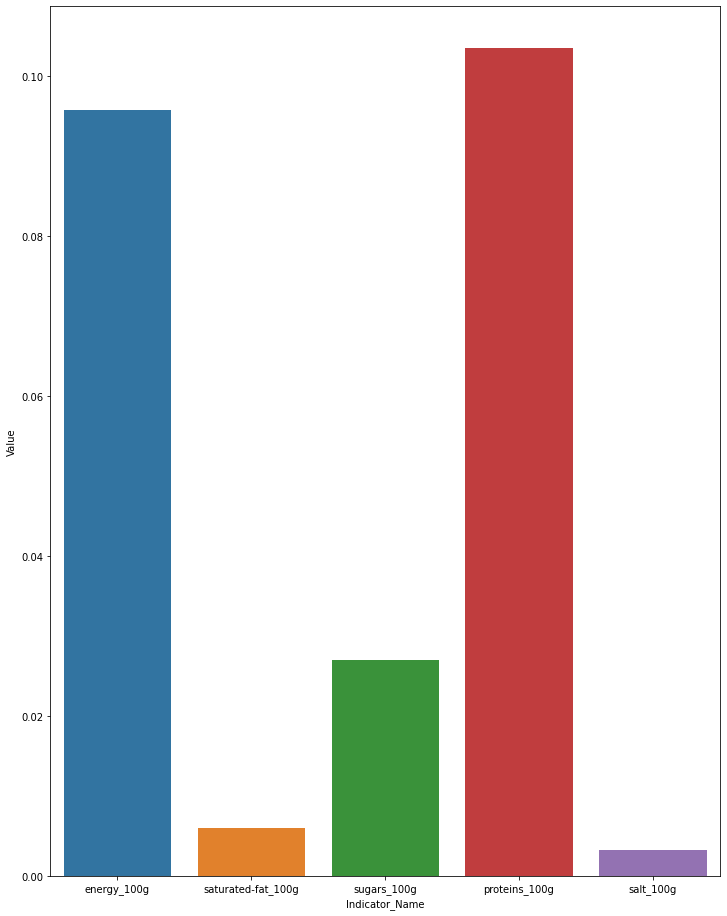

None


In [284]:
print(find_the_vegetarian(produit_donne))

# Export .csv

In [ ]:
from google.colab import files

df_france_vege.to_csv('df_france_vege.csv')
files.download('df_france_vege.csv')

In [ ]:
df_france_clean.to_csv('df_france_clean.csv')
files.download('df_france_clean.csv')